# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from google.colab import drive, files
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/bank_transactions.csv'

# Load the dataset
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**Memahami Struktur Data**

---



In [ ]:
#Memahami Struktur Data
print("Cek jumlah baris dan kolom:", df.shape)
print("\n")

#Tinjau jenis data di setiap kolom (numerikal atau kategorikal).
df.info()

Cek jumlah baris dan kolom: (1048567, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


**Menangani data yang Hilang dan duplikat**

---



In [ ]:
#Cek missing values
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [ ]:
#Handle Missing Values
df['CustomerDOB'] = df['CustomerDOB'].fillna(df['CustomerDOB'].mode()[0])
df['CustGender'] = df['CustGender'].fillna(df['CustGender'].mode()[0])
df['CustLocation'] = df['CustLocation'].fillna(df['CustLocation'].mode()[0])
df['CustAccountBalance'] = df['CustAccountBalance'].fillna(df['CustAccountBalance'].mean())


df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [ ]:
#Identifikasi nilai duplikat
df.duplicated().sum()

np.int64(0)

**Formatting Fitur**

---



In [ ]:
#Rename kolom TransactionAmount (INR) menjadi TransactionAmount
df = df.rename(columns={'TransactionAmount (INR)': 'TransactionAmount'})

In [ ]:
#Ubah kolom TransactionDate dan CustomerDOB ke dalam format DateTime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

<ipython-input-9-1555380a7486>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
<ipython-input-9-1555380a7486>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])


**Hitung Umur Customer**

---



In [ ]:
print(df['CustomerDOB'])
print('\nMax transaksi : ', df['TransactionDate'].max())

0         1994-10-01
1         2057-04-04
2         1996-11-26
3         2073-09-14
4         1988-03-24
             ...    
1048562   1990-08-04
1048563   1992-02-20
1048564   1989-05-18
1048565   1978-08-30
1048566   1984-05-03
Name: CustomerDOB, Length: 1048567, dtype: datetime64[ns]

Max transaksi :  2016-12-09 00:00:00


In [ ]:
#Hitung umur customer dengan tahun maksimal transaksi - tahun umur customer
year_in_dataset = df['TransactionDate'].max().year
df['CustomerAge'] = year_in_dataset - df['CustomerDOB'].dt.year

df['CustomerAge'].unique()

array([ 22, -41,  20, -57,  28, -56,  24,  34,  32,  38, -52, 216,  27,
        25,  31,  23,  30, -51,  37,  39,  19,  33,  26,  36,  35, -50,
        29,  41,  21, -58, -55, -16, -43,  17, -49, -25, -38, -54,  40,
        -5, -53,  12, -27,  18, -35, -44, -40, -37, -31,  16, -48, -32,
       -46, -36, -39, -45, -20, -47, -26, -28, -22,  14, -33, -42, -34,
       -30, -29, -21,   9,  15, -23, -24,   3,  13,  11,   6,   5, -17,
       -18, -11,  -3, -12, -14,   7, -15, -13, -19,   1,   0,  10,   8,
         4,  -7, -10,  -8,  -6,   2,  -4,  -9,  -2])

In [ ]:
#Hapus umur tidak realistis
df = df[df['CustomerAge'] >= 0]
df['CustomerAge'].unique()

array([ 22,  20,  28,  24,  34,  32,  38, 216,  27,  25,  31,  23,  30,
        37,  39,  19,  33,  26,  36,  35,  29,  41,  21,  17,  40,  12,
        18,  16,  14,   9,  15,   3,  13,  11,   6,   5,   7,   1,   0,
        10,   8,   4,   2])

Masih terdapat umur tidak realistis customer seperti 2, 4, 8, 216 tahun yang mana hal tersebut merupakan outlier.

**Analisis Distribusi dan Korelasi Fitur Numerik**

---



In [ ]:
#Statistika Deskriptif
df.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,CustomerAge
count,943321,9.433210e+05,943321,943321.000000,9.433210e+05,943321.000000
mean,1975-09-11 07:28:44.912304448,8.935639e+04,2016-07-25 13:04:32.526107648,157224.700559,1.418372e+03,40.767178
min,1800-01-01 00:00:00,0.000000e+00,2016-01-08 00:00:00,0.000000,0.000000e+00,0.000000
25%,1983-02-04 00:00:00,4.376580e+03,2016-06-09 00:00:00,124035.000000,1.500000e+02,25.000000
50%,1988-01-21 00:00:00,1.540641e+04,2016-08-20 00:00:00,164505.000000,4.130000e+02,28.000000
75%,1991-07-02 00:00:00,5.113370e+04,2016-09-09 00:00:00,200301.000000,1.090000e+03,33.000000
max,2016-02-22 00:00:00,5.536969e+07,2016-12-09 00:00:00,235959.000000,1.560035e+06,216.000000
std,NaN,4.609961e+05,NaN,51704.594407,5.998061e+03,46.239712


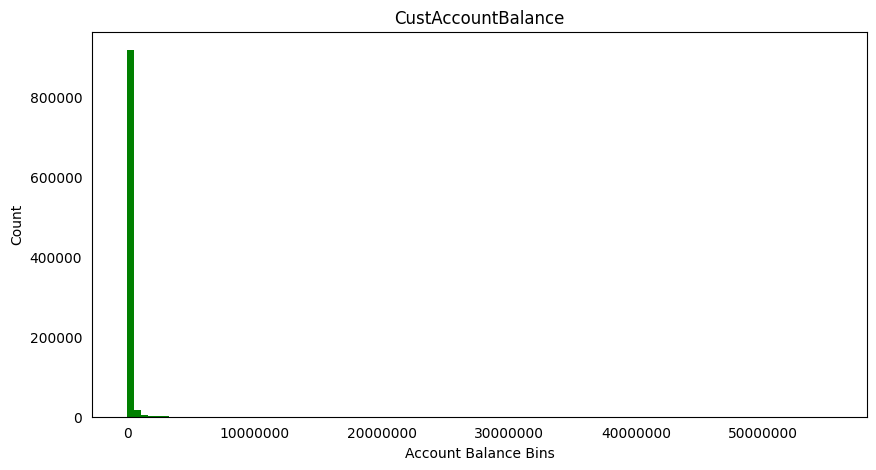

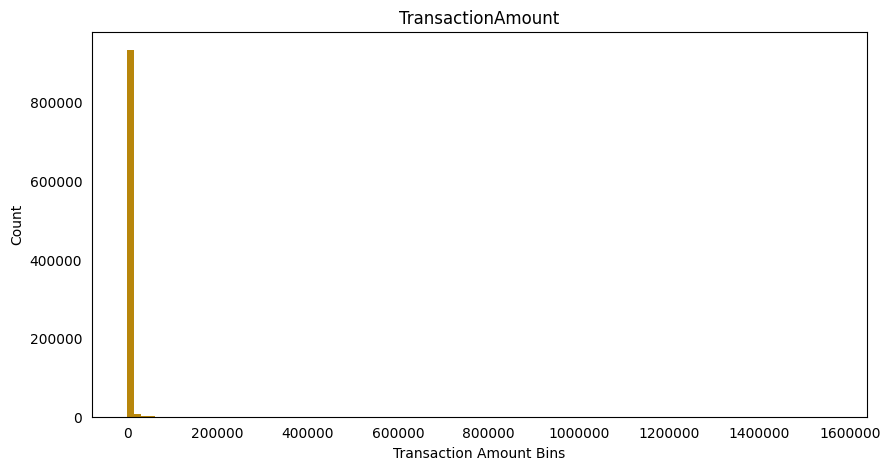

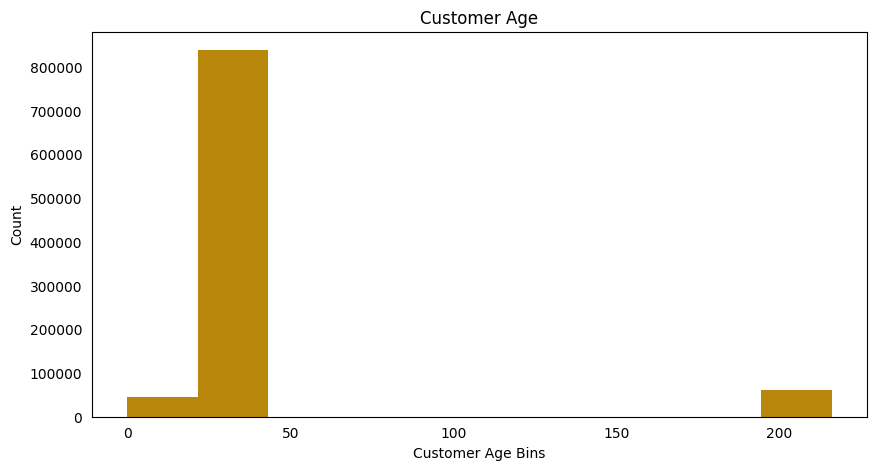

In [ ]:
plt.figure(figsize=(10,5))
plt.title("CustAccountBalance")
plt.xlabel("Account Balance Bins")
plt.ylabel("Count")
plt.hist(df.CustAccountBalance,bins=100,color="green")
plt.tick_params(bottom=False,left=False)
plt.ticklabel_format(style='plain')
plt.show()

plt.figure(figsize=(10,5))
plt.title("TransactionAmount")
plt.xlabel("Transaction Amount Bins")
plt.ylabel("Count")
plt.hist(df["TransactionAmount"],bins=100,color="darkgoldenrod")
plt.tick_params(bottom=False,left=False)
plt.ticklabel_format(style='plain')
plt.show()

plt.figure(figsize=(10,5))
plt.title("Customer Age")
plt.xlabel("Customer Age Bins")
plt.ylabel("Count")
plt.hist(df["CustomerAge"],bins=10,color="darkgoldenrod")
plt.tick_params(bottom=False,left=False)
plt.ticklabel_format(style='plain')
plt.show()

Insight :

1. CustAccountBalance dan TransactionAmount menunjukkan grafik right-skewed atau miring kekanan. Hal ini menunjukkan terdapat customer yang memiliki account balance yang banyak serta bertransaksi dalam jumlah yang tinggi namun jumlah mereka tidak banyak.
    
2. CustomerAge memiliki rata rata berkisar 40 tahunan serta terdapat outlier pada umur > 200 tahun.

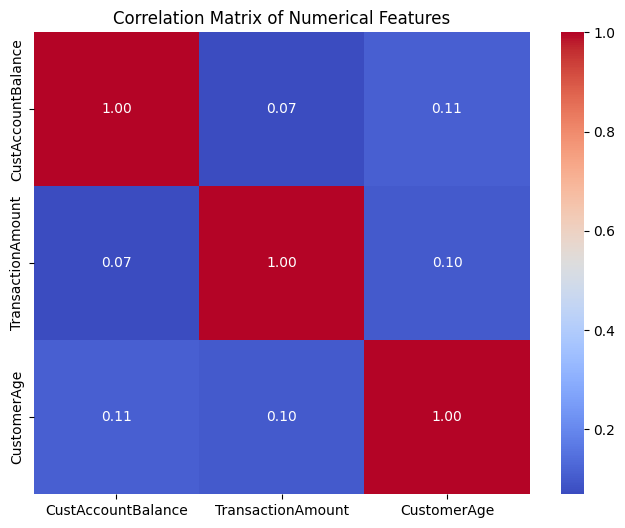

In [ ]:
numerical_features = ['CustAccountBalance', 'TransactionAmount', 'CustomerAge']
correlation_matrix = df[numerical_features].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**Visualisasi Data**

---



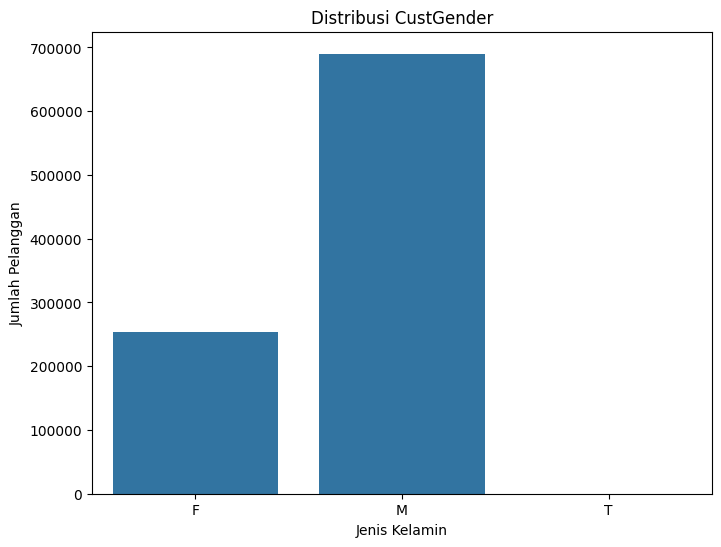

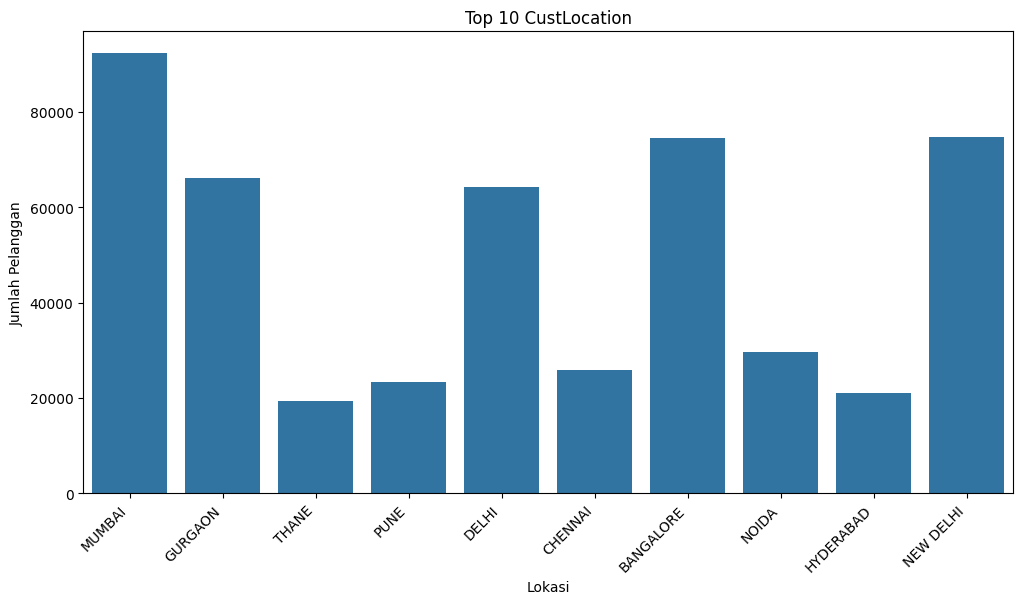

In [ ]:
# Visualisasi untuk variabel kategorikal 'CustGender'
plt.figure(figsize=(8, 6))
sns.countplot(x='CustGender', data=df)
plt.title('Distribusi CustGender')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Visualisasi untuk variabel kategorikal 'CustLocation'
top_locations = df['CustLocation'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='CustLocation', data=df[df['CustLocation'].isin(top_locations)])
plt.title('Top 10 CustLocation')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right') # Rotasi label sumbu x agar lebih mudah dibaca
plt.show()


Insight :

1. Pada data CustGender, Male (laki - laki) lebih sering melakukan transaksi daripada Female (perempuan). Serta terdapat nilai anomali yaitu T yang perlu dihapus nanti.
2. Persebaran CustLocation dapat dilihat pada grafik tersebut, tentunya dengan memanfaatkan top 10 lokasi yang sering melakukan transaksi.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
#Handle Missing Values dan handle duplicate values sudah dilakukan diatas
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount,0
CustomerAge,0


**Encoding Data Kategorikal**

---



In [ ]:
#Handle dahulu value T pada custGender
df.drop(df[df['CustGender']=='T'].index,inplace=True)
df['CustGender'].value_counts()

,count
CustGender,
M,690150
F,253170


In [ ]:
#Encoding
le = LabelEncoder()

df['CustGender'] = le.fit_transform(df['CustGender'])
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,CustomerAge
0,T1,C5841053,1994-10-01,0,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
2,T3,C4417068,1996-11-26,0,MUMBAI,17874.44,2016-02-08,142712,459.0,20
4,T5,C9031234,1988-03-24,0,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28
6,T7,C7126560,1992-01-26,0,MUMBAI,973.46,2016-02-08,173806,566.0,24
7,T8,C1220223,1982-01-27,1,MUMBAI,95075.54,2016-02-08,170537,148.0,34


In [ ]:
print(list(le.classes_))

['F', 'M']


Encoding berhasil dilakukan dengan mengubah value F dengan 0 dan M dengan 1

**Cek dan handle Outlier**

---



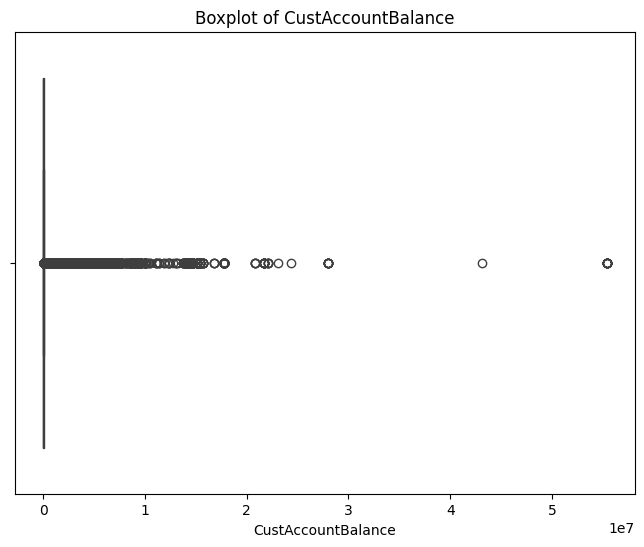

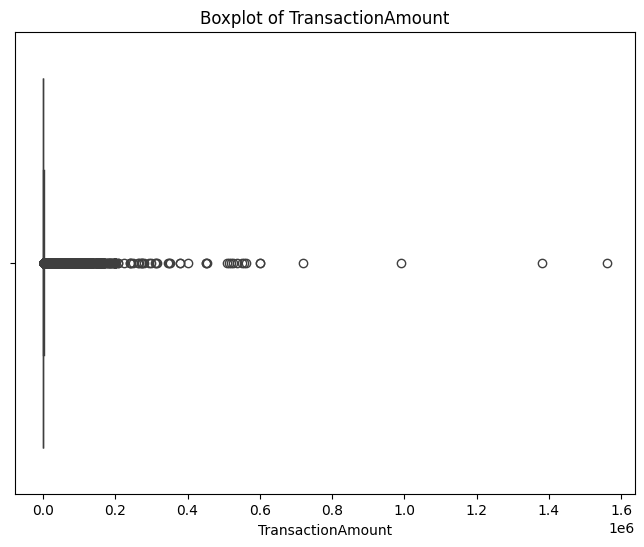

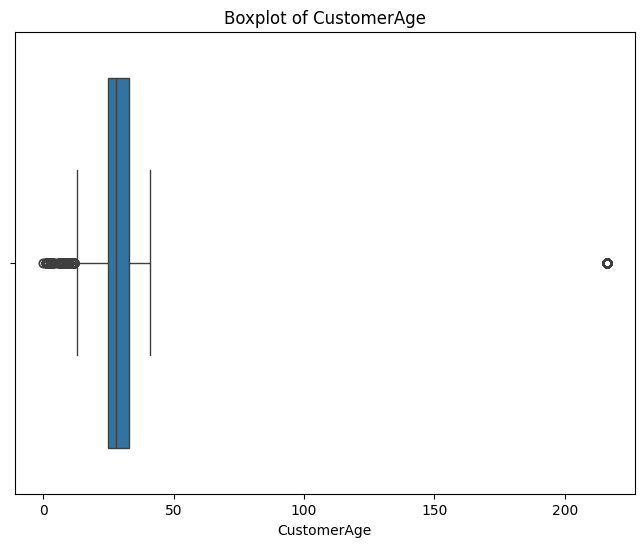

In [ ]:
columns_to_check = ['CustAccountBalance', 'TransactionAmount', 'CustomerAge']
for column in columns_to_check:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


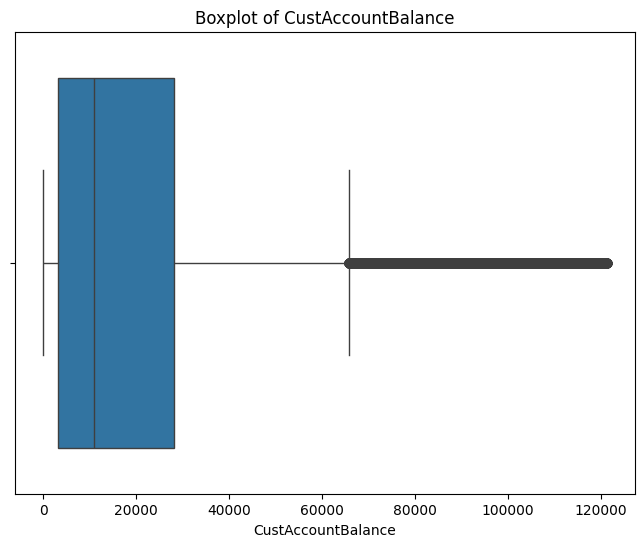

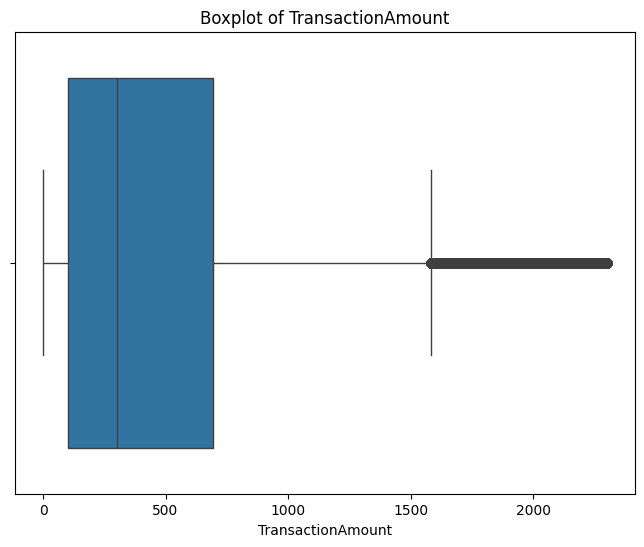

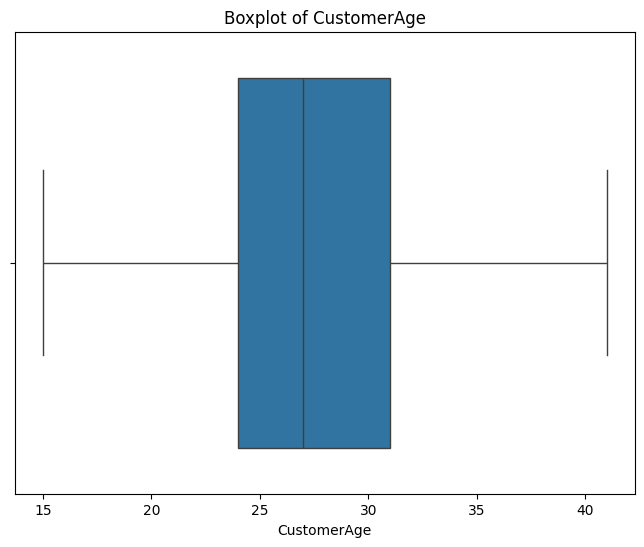

In [ ]:
# hapus outlier

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in columns_to_check:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


boxplot diatas adalah boxplot setelah outlier dihapus. Meskipun terlihat masih ada outlier pada CustAccountBalance dan TransactionAmount, outlier tersebut tidak perlu dihapus lagi karena outlier tersebut tidak terlalu menjomplang dan mencerminkan nilai ekstrim yang masih valid

In [ ]:
#Cek umur lagi
df['CustomerAge'].unique()

array([22, 20, 28, 24, 34, 32, 38, 27, 25, 31, 23, 30, 39, 33, 36, 35, 29,
       26, 41, 21, 37, 17, 19, 40, 18, 16, 15])

Sudah tidak terdapat umur yang terlalu menjomplang juga seperti 216 tahun dsb

In [ ]:
#Reset index
df.reset_index(drop=True, inplace=True)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,CustomerAge
0,T1,C5841053,1994-10-01,0,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T3,C4417068,1996-11-26,0,MUMBAI,17874.44,2016-02-08,142712,459.0,20
2,T5,C9031234,1988-03-24,0,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28
3,T7,C7126560,1992-01-26,0,MUMBAI,973.46,2016-02-08,173806,566.0,24
4,T8,C1220223,1982-01-27,1,MUMBAI,95075.54,2016-02-08,170537,148.0,34


**RFM**

---



Disini, kita akan melakukan customer segmentation yang berfungsi bagi bank untuk mengimprovisasi dan meningkatkan profit serta kepuasan pelanggan.

Kita akan melakukan customer segmentation dengan memanfaatkan RFM (Recency, Frequency, Monetary)


*   Recency (R) / Kebaruan: Seberapa baru customer bertransaksi.
*   Frequency (F) / Frekuensi: Seberapa sering customer bertransaksi dalam periode tertentu.
*   Monetary (M) / Keuangan: Jumlah total yang ditransaksikan oleh customer.


**Recency**

In [ ]:
# Menentukan tanggal acuan
cut_off_date = df['TransactionDate'].max()

# Menghitung recency
recency_df = df.groupby('CustomerID')['TransactionDate'].max().reset_index()
recency_df['Recency'] = (cut_off_date - recency_df['TransactionDate']).dt.days

# Menampilkan hasil recency
recency_df.head(100)

,CustomerID,TransactionDate,Recency
0,C1010011,2016-09-08,92
1,C1010012,2016-08-14,117
2,C1010014,2016-01-08,336
3,C1010018,2016-09-15,85
4,C1010031,2016-04-08,245
...,...,...,...
95,C1010467,2016-12-09,0
96,C1010481,2016-08-17,114
97,C1010484,2016-08-23,108
98,C1010485,2016-08-15,116


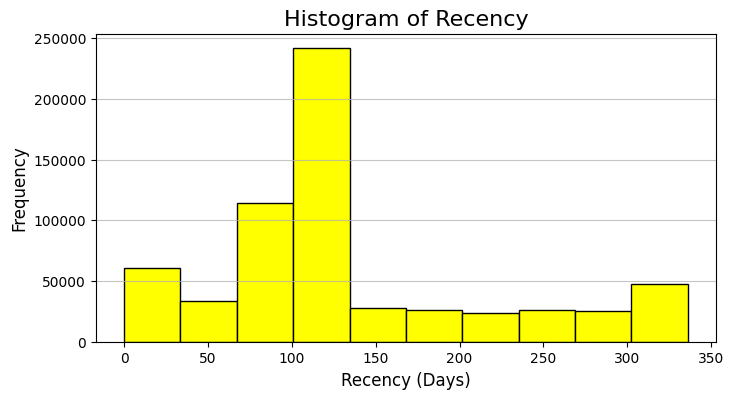

In [ ]:
# Plotting the histogram using Matplotlib
plt.figure(figsize=(8, 4))  # Set the figure size
plt.hist(recency_df['Recency'], bins=10, color='yellow', edgecolor='black')  # Histogram with 10 bins
plt.xlabel('Recency (Days)', fontsize=12)  # X-axis label
plt.ylabel('Frequency', fontsize=12)        # Y-axis label
plt.title('Histogram of Recency', fontsize=16)  # Title of the plot
plt.grid(axis='y', alpha=0.75)  # Optional: Add gridlines for better readability
plt.show()  # Display the plot

**Frequency dan penggabungan dengan Recency menjadi 1 tabel**

In [ ]:
rf_table = df.groupby('CustomerID').agg({
    'TransactionAmount': ['count', 'sum', 'mean'],
    'TransactionDate': 'max',
    'CustGender': 'first'
}).reset_index()
rf_table.columns = ['CustomerID', 'TransactionCount', 'TotalAmount', 'AverageAmount', 'LastTransactionDate', 'CustGender']
rf_table = rf_table.merge(
    recency_df[['CustomerID', 'Recency']], on='CustomerID', how='left'
)

rf_table['Age'] = df.groupby('CustomerID')['CustomerAge'].first().values
rf_table.head(20)

,CustomerID,TransactionCount,TotalAmount,AverageAmount,LastTransactionDate,CustGender,Recency,Age
0,C1010011,1,356.00,356.00,2016-09-08,1,92,33
1,C1010012,1,1499.00,1499.00,2016-08-14,1,117,22
2,C1010014,1,1205.00,1205.00,2016-01-08,0,336,24
3,C1010018,1,30.00,30.00,2016-09-15,0,85,26
4,C1010031,2,1864.00,932.00,2016-04-08,1,245,32
5,C1010035,1,50.00,50.00,2016-01-08,1,336,24
6,C1010038,1,100.00,100.00,2016-07-09,0,153,24
7,C1010039,1,915.00,915.00,2016-02-09,1,304,18
8,C1010041,1,20.00,20.00,2016-07-09,0,153,24
9,C1010045,1,201.00,201.00,2016-08-18,1,113,29


**Standarisasi Fitur**

---



In [ ]:
features = rf_table[['TransactionCount', 'TotalAmount', 'AverageAmount', 'Recency']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# **6. Pembangunan Model Clustering**

# **a. Pembangunan Model**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah rekomendasi tahapannya.

1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

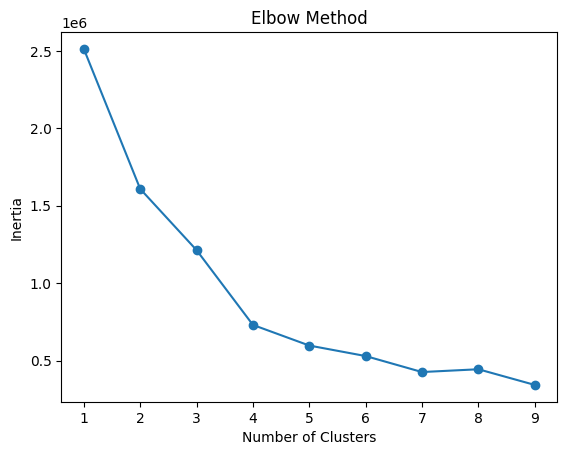

In [ ]:
#Melakukan perhitungan nilai K optimal
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Elbow method mendapatkan total cluster sebanyak 4

In [ ]:
# Pemodelan
kmeans = KMeans(n_clusters=4, random_state=42)
rf_table['Cluster'] = kmeans.fit_predict(scaled_features)

# Melakukan pelabelan pada tiap cluster yang ada
cluster_labels = {
    0: 'Medium Value Customers',
    1: 'High Value Customers',
    2: 'Low Value Customers',
    3: 'Loyal Customers'
}
rf_table['ClusterLabel'] = rf_table['Cluster'].map(cluster_labels)

# **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah rekomendasi tahapannya.

1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
silhouette_avg = silhouette_score(scaled_features, rf_table['ClusterLabel'])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5033999521683726


# **c. Feature Selection (Opsional)**

In [ ]:
n_features_to_select = 2
pca = PCA(n_components=n_features_to_select)
pca_rf_table = pca.fit_transform(scaled_features)

In [ ]:
x_important = pca_rf_table

kmeans = KMeans(n_clusters=4, random_state=1)
silhouette_score(x_important, kmeans.fit_predict(x_important))

np.float64(0.4279264652759253)

Dengan melakukan feature selection menggunakan PCA, hasil silhouette score yang didapatkan mengalami Penurunan.

## **d. Visualisasi Hasil Clustering**

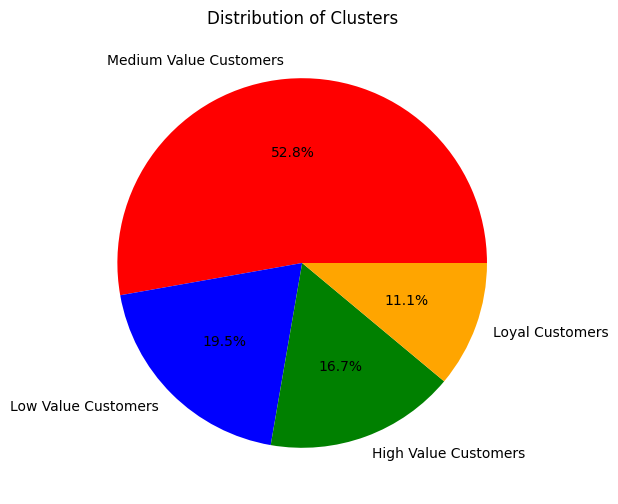

In [ ]:
# Visualisasi cluster dalam pie chart
plt.figure(figsize=(6, 6))
rf_table['ClusterLabel'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'blue', 'green', 'orange', 'purple'])
plt.title('Distribution of Clusters')
plt.ylabel('')
plt.show()

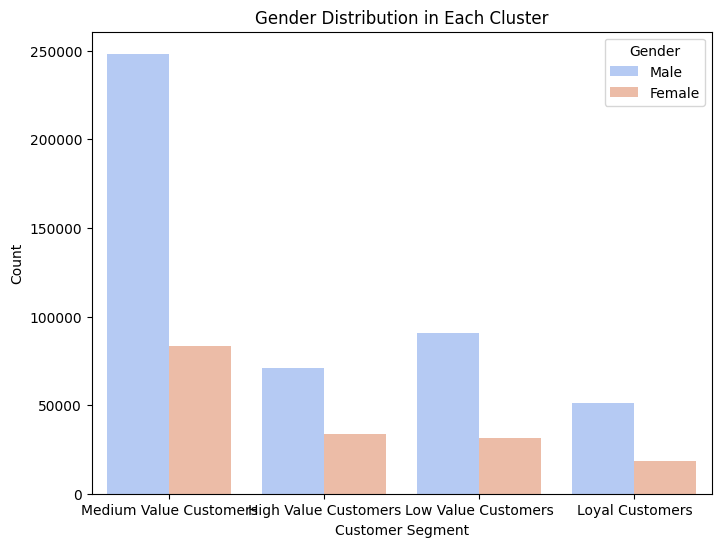

In [ ]:
#Visualisasi distribusi data per gender
plt.figure(figsize=(8, 6))
gender_mapping = {0: 'Female', 1: 'Male'}  # Map 0 to Female and 1 to Male
rf_table['CustGenderLabel'] = rf_table['CustGender'].map(gender_mapping)
sns.countplot(x=rf_table['ClusterLabel'], hue=rf_table['CustGenderLabel'], palette='coolwarm')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.title('Gender Distribution in Each Cluster')
plt.legend(title='Gender')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

In [ ]:
# #Gabungkan hasil Cluster ke dalam df
# df = pd.merge(df, rf_table[['CustomerID', 'ClusterLabel']], on='CustomerID', how='left')

rf_table.head()

,CustomerID,TransactionCount,TotalAmount,AverageAmount,LastTransactionDate,CustGender,Recency,Age,Cluster,ClusterLabel,CustGenderLabel
0,C1010011,1,356.0,356.0,2016-09-08,1,92,33,0,Medium Value Customers,Male
1,C1010012,1,1499.0,1499.0,2016-08-14,1,117,22,1,High Value Customers,Male
2,C1010014,1,1205.0,1205.0,2016-01-08,0,336,24,2,Low Value Customers,Female
3,C1010018,1,30.0,30.0,2016-09-15,0,85,26,0,Medium Value Customers,Female
4,C1010031,2,1864.0,932.0,2016-04-08,1,245,32,3,Loyal Customers,Male


In [ ]:
# df['CustGender'] = le.inverse_transform(df[['CustGender']])
# df.head()


rf_table['CustGender'] = le.inverse_transform(rf_table[['CustGender']])
rf_table.head()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,CustomerID,TransactionCount,TotalAmount,AverageAmount,LastTransactionDate,CustGender,Recency,Age,Cluster,ClusterLabel,CustGenderLabel
0,C1010011,1,356.0,356.0,2016-09-08,M,92,33,0,Medium Value Customers,Male
1,C1010012,1,1499.0,1499.0,2016-08-14,M,117,22,1,High Value Customers,Male
2,C1010014,1,1205.0,1205.0,2016-01-08,F,336,24,2,Low Value Customers,Female
3,C1010018,1,30.0,30.0,2016-09-15,F,85,26,0,Medium Value Customers,Female
4,C1010031,2,1864.0,932.0,2016-04-08,M,245,32,3,Loyal Customers,Male


In [ ]:
# Drop kolom 'CustGenderLabel' dan 'Cluster' pada rf_table
rf_table = rf_table.drop(columns=['CustGenderLabel', 'Cluster'], errors='ignore')
rf_table.head()


,CustomerID,TransactionCount,TotalAmount,AverageAmount,LastTransactionDate,CustGender,Recency,Age,ClusterLabel
0,C1010011,1,356.0,356.0,2016-09-08,M,92,33,Medium Value Customers
1,C1010012,1,1499.0,1499.0,2016-08-14,M,117,22,High Value Customers
2,C1010014,1,1205.0,1205.0,2016-01-08,F,336,24,Low Value Customers
3,C1010018,1,30.0,30.0,2016-09-15,F,85,26,Medium Value Customers
4,C1010031,2,1864.0,932.0,2016-04-08,M,245,32,Loyal Customers


In [ ]:
# Analisis karakteristik tiap cluster
top_features = ['TransactionCount', 'TotalAmount', 'AverageAmount', 'Recency', 'Age']
selected_telco_df = rf_table.copy()

for cluster_label in selected_telco_df['ClusterLabel'].unique():
    cluster_data = selected_telco_df[selected_telco_df['ClusterLabel'] == cluster_label]
    print(f"\nKarakteristik Cluster {cluster_label}:")
    # Menghitung deskripsi statistik dan menyimpannya dalam DataFrame
    hsl_statistik = pd.DataFrame()
    for feature in top_features:
        hsl_statistik[feature] = cluster_data[feature].describe()
    display(hsl_statistik)


Karakteristik Cluster Medium Value Customers:


,TransactionCount,TotalAmount,AverageAmount,Recency,Age
count,331595.0,331595.000000,331595.000000,331595.000000,331595.000000
mean,1.0,270.991033,270.991033,93.144797,27.883837
std,0.0,220.735139,220.735139,35.317871,4.916789
min,1.0,0.000000,0.000000,0.000000,15.000000
25%,1.0,96.000000,96.000000,82.000000,24.000000
50%,1.0,201.380000,201.380000,104.000000,27.000000
75%,1.0,420.000000,420.000000,114.000000,31.000000
max,1.0,923.000000,923.000000,154.000000,41.000000



Karakteristik Cluster High Value Customers:


,TransactionCount,TotalAmount,AverageAmount,Recency,Age
count,104674.000000,104674.000000,104674.000000,104674.000000,104674.000000
mean,1.014454,1439.467662,1416.362237,128.559738,29.593366
std,0.119355,454.485669,399.942486,73.633006,5.198616
min,1.000000,821.000000,821.000000,0.000000,15.000000
25%,1.000000,1035.000000,1035.000000,91.000000,26.000000
50%,1.000000,1350.000000,1350.000000,111.000000,29.000000
75%,1.000000,1747.000000,1715.000000,154.000000,33.000000
max,2.000000,4550.000000,2300.490000,336.000000,41.000000



Karakteristik Cluster Low Value Customers:


,TransactionCount,TotalAmount,AverageAmount,Recency,Age
count,122360.000000,122360.000000,122360.000000,122360.000000,122360.000000
mean,1.001708,323.313278,323.078964,261.702713,27.994459
std,0.041294,275.394306,275.416906,51.417930,4.912444
min,1.000000,0.000000,0.000000,183.000000,15.000000
25%,1.000000,100.000000,100.000000,215.000000,24.000000
50%,1.000000,247.000000,246.000000,275.000000,27.000000
75%,1.000000,500.000000,500.000000,305.000000,31.000000
max,2.000000,1243.450000,1243.450000,336.000000,41.000000



Karakteristik Cluster Loyal Customers:


,TransactionCount,TotalAmount,AverageAmount,Recency,Age
count,69460.000000,69460.000000,69460.000000,69460.000000,69460.000000
mean,2.098229,991.459557,471.678969,89.903830,28.240469
std,0.320678,704.561062,326.090158,50.095972,5.031181
min,2.000000,2.000000,1.000000,0.000000,15.000000
25%,2.000000,424.000000,205.000000,62.000000,24.000000
50%,2.000000,817.000000,392.860000,92.000000,27.000000
75%,2.000000,1434.000000,680.000000,110.000000,31.000000
max,6.000000,5780.550000,1926.850000,336.000000,41.000000


# **Interpretasi data :**

1. Medium Value Customers :

    a) Jumlah data : 331.595 Customers

    b) Jumlah rata-rata Transaksi : 1 kali transaksi

    c) Rata - rata spend tiap transaksi : 270 INR

    d) Kebaruan transaksi : 93 hari (± 3 bulan yang lalu)


Analisis :
Pelanggan dalam cluster ini memiliki jumlah sebanyak 331.595 Customers dan melakukan rata rata transaksi sebanyak 1 kali. Meskipun tidak tergolong pelanggan loyal, mereka memiliki potensi untuk dikembangkan menjadi pelanggan loyal jika diberlakukan strategi yang tepat untuk cluster ini. Rata - rata spend cluster ini juga paling kecil dibandingkan cluster lainnya, namun dengan transaksi mereka masih dalam jangkauan yang relatif baru (sekitar 3 bulan), strategi yang dapat dikembangkan dapat berupa kampanye follow-up atau promosi personalisasi masih relevan untuk meningkatkan rata - rata transaksi.


---



2. High Value Customers :

    a) Jumlah data : 104.674 Customers

    b) Jumlah rata-rata Transaksi : 1 kali transaksi

    c) Rata - rata spend tiap transaksi : 1416 INR

    d) Kebaruan transaksi : 128 hari (± 4 bulan yang lalu)


Analisis :

Pelanggan dalam cluster ini memiliki jumlah sebanyak 104.674 customers dengan jumlah spend yang sangat tinggi meskipun hanya melakukan rata - rata transaksi sebanyak 1 kali. Mereka memberikan kontribusi besar dalam jumlah spend tiap transaksi namun belum terlalu menunjukkan loyalitas. Dengan rentang waktu transaksi terakhir sekitar 4 bulan, pelanggan ini sangat berpotensi untuk dipertahankan melalui pendekatan eksklusif seperti penawaran VIP, program loyalitas premium, atau diskon bernilai tinggi yang dapat dibuat untuk mendorong transaksi lanjutan.


---



3. Low Value Customers :

    a) Jumlah data : 122.360 Customers

    b) Jumlah rata-rata Transaksi : 1 kali transaksi

    c) Rata - rata spend tiap transaksi : 323 INR

    d) Kebaruan transaksi : 261 hari (± 8 bulan yang lalu)


Analisis :

Pelanggan pada cluster ini memiliki jumlah sebanyak 122.360 customers dan tergolong kurang aktif karena sudah lama tidak melakukan pembelian kembali (terakhir sekitar ± 8 bulan yang lalu) dan kontribusinya terhadap jumlah transaksi relatif kecil. Strategi pemasaran ulang (remarketing) terhadap cluster ini harus dipertimbangkan secara efisien, misalnya dengan penawaran khusus yang sangat menarik atau bundling produk bernilai rendah agar dapat mendorong customers pada cluster ini untuk melakukan transaksi.


---



4. Loyal Value Customers :

    a) Jumlah data : 69.460 Customers

    b) Jumlah rata-rata Transaksi : 2 kali transaksi

    c) Rata - rata spend tiap transaksi : 471 INR

    d) Kebaruan transaksi : 89 hari (± 2-3 bulan yang lalu)


Analisis :

Pelanggan pada cluster ini memiliki jumlah yang paling kecil diantara cluster lainnya, yaitu sebanyak 69.460 Customers, namun cluster ini merupakan aset berharga karena sudah menunjukkan loyalitas dengan melakukan rata - rata transaksi paling banyak, yaitu 2 kali dan masih aktif dalam jangka waktu 2-3 bulan terakhir. Meskipun nilai rata-rata pembelian mereka tidak setinggi High Value Customers, namun konsistensinya membuat mereka sangat penting untuk dipertahankan. Strategi yang sesuai adalah mempertahankan keterlibatan mereka melalui program loyalitas, pemberian poin reward, atau konten eksklusif yang menjaga hubungan jangka panjang dengan customers pada cluster ini.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
rf_table.to_csv('Klasifikasiygini.csv', index=False)
files.download('Klasifikasiygini.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>